In [1]:
import welly

##### nav to drive with .las

In [3]:
%pwd

'C:\\Users\\Thomas.Sandison\\geocomp-18\\logshape'

In [4]:
ls ..\logshape\*.las

 Volume in drive C is Local Disk
 Volume Serial Number is 6E93-3D5D

 Directory of C:\Users\Thomas.Sandison\geocomp-18\logshape

12/10/2018  10:42           507,088 22_15_3__KB.las
12/10/2018  10:42           507,088 well.las
               2 File(s)      1,014,176 bytes
               0 Dir(s)  851,422,232,576 bytes free


In [5]:
import lasio

l = lasio.read('..\logshape\well.las')  

Header section Parameter regexp=~P was not found.


In [6]:
l

In [7]:
l.header['Well']  

[HeaderItem(mnemonic=STRT, unit=m, value=902.1352, descr=START DEPTH),
 HeaderItem(mnemonic=STEP, unit=m, value=0.1524, descr=STEP DEPTH),
 HeaderItem(mnemonic=STOP, unit=m, value=2928.7504, descr=STOP DEPTH),
 HeaderItem(mnemonic=NULL, unit=, value=-999.25, descr=NULL VALUE),
 HeaderItem(mnemonic=COMP, unit=, value=, descr=COMPANY),
 HeaderItem(mnemonic=WELL, unit=, value=22/15-3, descr=WELL),
 HeaderItem(mnemonic=LOC, unit=, value=, descr=LOCATION - AREA),
 HeaderItem(mnemonic=FLD, unit=, value=GBR_UNASSIGNED, descr=FIELD),
 HeaderItem(mnemonic=CTRY, unit=, value=GBR, descr=COUNTRY),
 HeaderItem(mnemonic=DATE, unit=, value=, descr=WELL DATE),
 HeaderItem(mnemonic=UWI, unit=, value=12000082036501, descr=UWI),
 HeaderItem(mnemonic=XWELL, unit=m, value=614700.99, descr=X POS),
 HeaderItem(mnemonic=YWELL, unit=m, value=6383465.707, descr=Y POS),
 HeaderItem(mnemonic=EDF, unit=, value=32.3088646176, descr=DERRICK FLOOR ELE...)]

In [8]:
l.data

array([[9.0213520e+02, 3.0470400e+01, 2.6130000e-01],
       [9.0228760e+02, 3.0818900e+01, 2.6720000e-01],
       [9.0244000e+02, 3.0184400e+01, 2.5640000e-01],
       ...,
       [2.9284456e+03, 7.0355200e+01, 9.3490000e-01],
       [2.9285980e+03, 7.0355200e+01, 9.3490000e-01],
       [2.9287504e+03,           nan,           nan]])

In [9]:
l.curves.GR 

CurveItem(mnemonic=GR, unit=API, value=, descr=2      GR, original_mnemonic=GR, data.shape=(13299,))

In [10]:
l['GR'] 

array([30.4704, 30.8189, 30.1844, ..., 70.3552, 70.3552,     nan])

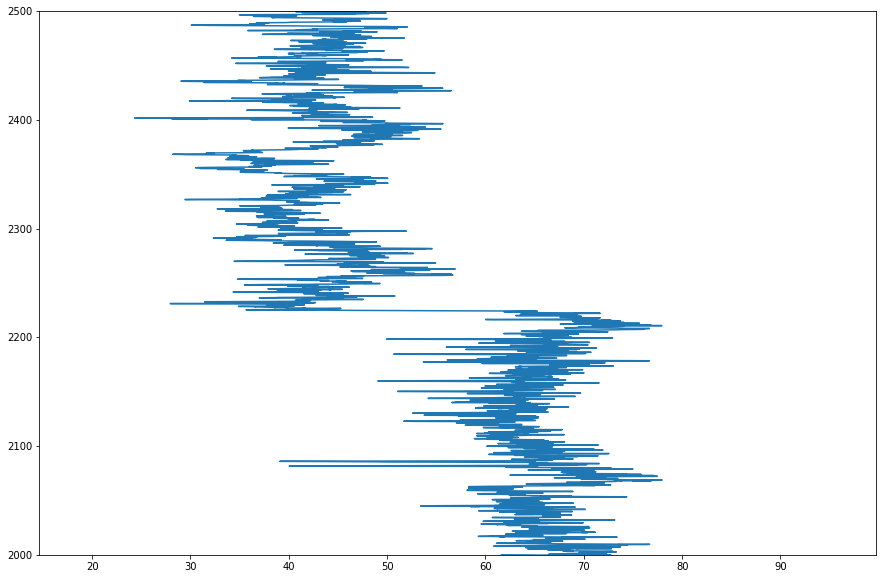

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
plt.plot(l['GR'], l['DEPT'])
plt.ylim(2000,2500)
plt.show()

In [12]:
l.df().head()  

,GR,V_CLAY_ALL
DEPT,,
902.1352,30.4704,0.2613
902.2876,30.8189,0.2672
902.4400,30.1844,0.2564
902.5924,30.2714,0.2579
902.7448,30.7941,0.2667


In [14]:
from welly import Well

w = Well.from_las('..\logshape\well.las') 

Header section Parameter regexp=~P was not found.


In [15]:
w

Well(uwi: '12000082036501', 2 curves: ['GR', 'V_CLAY_ALL'])

In [16]:
w.df().head()

,GR,V_CLAY_ALL
DEPT,,
902.1352,30.4704,0.2613
902.2876,30.8189,0.2672
902.4400,30.1844,0.2564
902.5924,30.2714,0.2579
902.7448,30.7941,0.2667


In [17]:
gr = w.data['GR']  
gr

Curve([30.4704, 30.8189, 30.1844, ..., 70.3552, 70.3552,     nan])

In [18]:
gr.basis

array([ 902.1352,  902.2876,  902.44  , ..., 2928.4456, 2928.598 ,
       2928.7504])